In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from math import sqrt
import matplotlib.pyplot as plt
# Load data
data=pd.read_excel(r"C:/Users/eme_m/Downloads/CAS_simu_young2.xlsx")
#data.head()

# Spliting data into Feature
X=data[['CaO', 'Al2O3', 'SiO2']]
y=data['E']

kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

i=1
RMSEt=[]
RMSE=[]
while i < 10 :
    regr=MLPRegressor(hidden_layer_sizes=(i), activation='relu',solver='lbfgs', 
                  batch_size='auto', learning_rate='constant', learning_rate_init=0.001,
                  max_iter=300, shuffle=True, random_state=None).fit(X_train, y_train)
    
    ypred=regr.predict(X_train)
    MSE=mean_squared_error(y_train, ypred)
    RMSEt.append(sqrt(MSE))
    R2=r2_score(y_train, ypred)
    
    print('RMSE=', RMSEt ,'R2=',R2 , 'neurons=',i)

    ypred=regr.predict(X_test)
    MSE=mean_squared_error(y_test, ypred)
    RMSE.append(sqrt(MSE))
    R2=r2_score(y_test, ypred)
    
    print('RMSE=', RMSE ,'R2=',R2 , 'neurons=',i)
    i=i+1

RMSE= [16.240034327511] R2= 1.1102230246251565e-16 neurons= 1
RMSE= [18.12068024748125] R2= -0.03344025725819466 neurons= 1
RMSE= [16.240034327511, 6.069223192582605] R2= 0.8603334737293088 neurons= 2
RMSE= [18.12068024748125, 6.791984074565005] R2= 0.85481234219451 neurons= 2
RMSE= [16.240034327511, 6.069223192582605, 3.070706650311645] R2= 0.9642477998205783 neurons= 3
RMSE= [18.12068024748125, 6.791984074565005, 3.1522885405726178] R2= 0.9687256488784397 neurons= 3
RMSE= [16.240034327511, 6.069223192582605, 3.070706650311645, 2.943654415257943] R2= 0.9671451295354065 neurons= 4
RMSE= [18.12068024748125, 6.791984074565005, 3.1522885405726178, 3.036650429736936] R2= 0.9709780906330164 neurons= 4
RMSE= [16.240034327511, 6.069223192582605, 3.070706650311645, 2.943654415257943, 2.4797417910605435] R2= 0.9766848058265005 neurons= 5
RMSE= [18.12068024748125, 6.791984074565005, 3.1522885405726178, 3.036650429736936, 3.071274387668854] R2= 0.9703125006528697 neurons= 5
RMSE= [16.240034327511

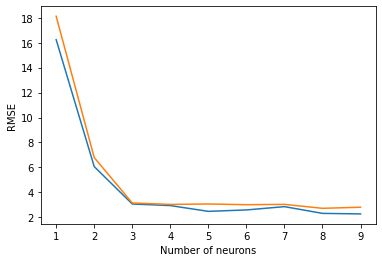

In [34]:
i=[1,2,3,4,5,6,7,8,9]
plt.plot(i,RMSEt)
plt.plot(i,RMSE)
plt.xlabel('Number of neurons')
plt.ylabel('RMSE')
plt.savefig('qqq')